In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings as wr
wr.filterwarnings(action='ignore')

In [2]:
# Loading the data from csv to Pandas DataFrame
df= pd.read_csv(r"medical_cost_insurance.csv", encoding = 'unicode_escape')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# First five rows of DataFrame
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# number of rows and columns
df.shape

(1338, 7)

In [5]:
# getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Categorical Features:
 

->Sex
->Smoker
->Region

In [6]:
# checking for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Data Analysis

In [7]:
# Statistical Measures of dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


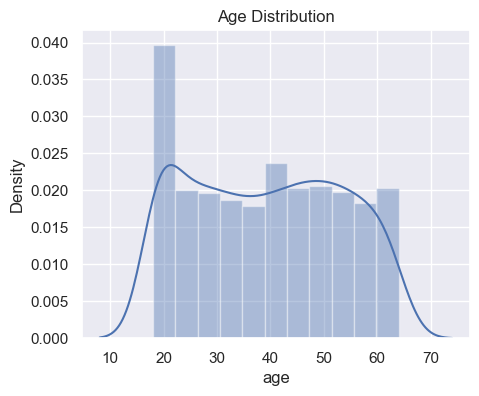

In [8]:
# distributtion of age value
sns.set()
plt.figure(figsize=(5,4))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

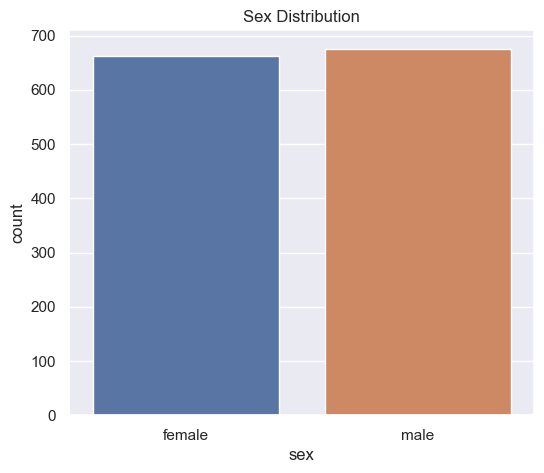

In [9]:
# Gender Column
plt.figure(figsize=(6,5))
sns.countplot(x='sex', data= df)
plt.title('Sex Distribution')
plt.show()

In [10]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

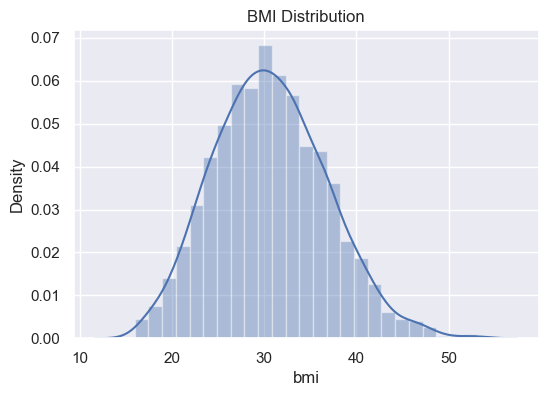

In [11]:
# BMI Distribution
plt.figure(figsize=(6,4))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI Range-> 18.5 to 24.9

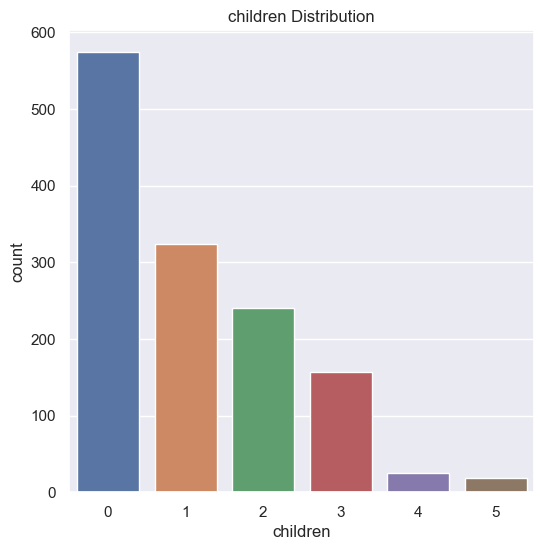

In [12]:
# Children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data= df)
plt.title('children Distribution')
plt.show()

In [13]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

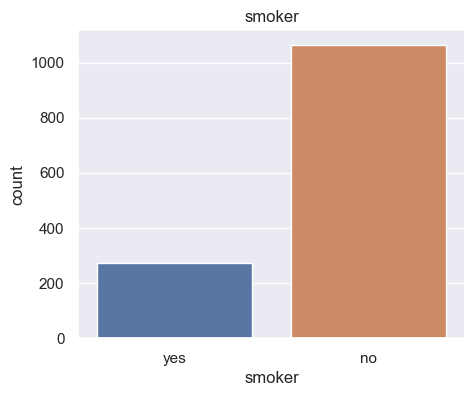

In [14]:
# Smoker column
plt.figure(figsize=(5,4))
sns.countplot(x='smoker', data=df)
plt.title('smoker')
plt.show()

In [15]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

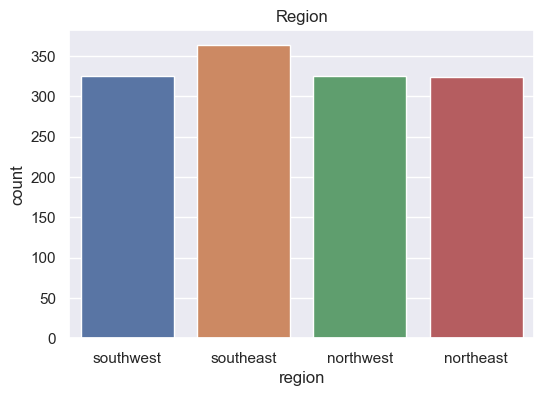

In [16]:
# Region column
plt.figure(figsize=(6,4))
sns.countplot(x='region', data=df)
plt.title('Region')
plt.show()

In [17]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

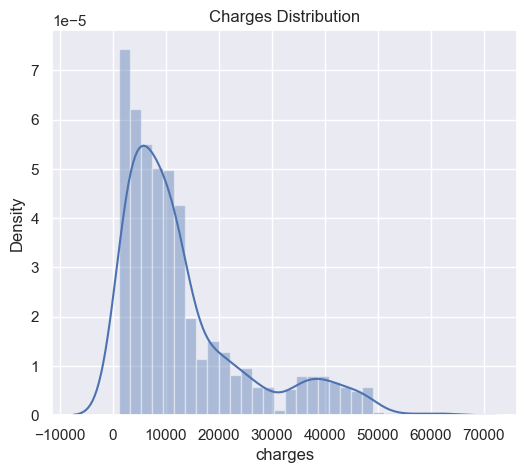

In [18]:
# Disribution of charges
plt.figure(figsize=(6,5))
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

# Data Pre-Processing 

Encoding the categorical features

In [19]:
# Encoding sex column
df.replace({'sex':{'male': 1, 'female': 0}}, inplace=True)

# Encoding smoker column
df.replace({'smoker':{'yes': 1, 'no': 0}},inplace=True)

# Encoding region column
df.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}},inplace=True)

In [20]:
X = df.iloc[:,:-1]
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,0
2,28,1,33.000,3,0,0
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3
1334,18,0,31.920,0,0,2
1335,18,0,36.850,0,0,0
1336,21,0,25.800,0,0,1


In [21]:
Y = df.iloc[:,-1:]
Y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


# Splitting Dataset in to Training data and Test data:

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [23]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


# Model Training

Linear Regression

In [24]:
# Loading the Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

# Model Evaluation

In [25]:
# Prediction on Training Data
training_data_prediction = regressor.predict(X_train)

In [26]:
# R Squared value
from sklearn import metrics
r2_train = metrics.r2_score(Y_train,training_data_prediction)
print("R Squared value:", r2_train)

R Squared value: 0.751505643411174


In [27]:
# Prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [28]:
# R Squared value
from sklearn import metrics
r2_test = metrics.r2_score(Y_test,test_data_prediction)
print("R Squared value:", r2_test)

R Squared value: 0.7447273869684077


# Building a Predictive System

In [29]:
input_data = (62,0,26.29,0,1,0)

In [30]:
# changing the input_data to a numpy array
input_data_as_np = np.asarray(input_data)
input_data_as_np


array([62.  ,  0.  , 26.29,  0.  ,  1.  ,  0.  ])

In [31]:
# reshape the array
input_data_reshaped = input_data_as_np.reshape(1,-1)

In [32]:
prediction = regressor.predict(input_data_reshaped)
print(prediction)

[[35663.5965722]]


In [33]:
print("The Insurance cost is USD",prediction[0])

The Insurance cost is USD [35663.5965722]
